## Ejemplo de Aplicación con la red IEEE 13 modificada ##


In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%autoreload 2

In [11]:
import math

In [12]:
import pandapower as pp

In [13]:
import pandas as pd

In [14]:
import pyomo.environ as pe

In [15]:
import matplotlib.pyplot as plt

In [16]:
import ModelWriters as mw

In [17]:
import ModelWriters.Scenes as Scenes

In [18]:
import ModelWriters.Resources as Resources

In [19]:
import ModelWriters.Simulation as Simulation

Creating Network

In [123]:
net = pp.create_empty_network() 

Adding line parameter data:

In [124]:
line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 0.40, "x_ohm_per_km": 0.30, "max_i_ka": 0.300, "type": "al", "q_mm2": 95, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 95", element='line')

line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 0.50, "x_ohm_per_km": 0.35, "max_i_ka": 0.250, "type": "al", "q_mm2": 70, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 70", element='line')

line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 0.70, "x_ohm_per_km": 0.40, "max_i_ka": 0.190, "type": "al", "q_mm2": 50, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 50", element='line')

line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 1.20, "x_ohm_per_km": 0.45, "max_i_ka": 0.130, "type": "al", "q_mm2": 25, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 25", element='line')

In [125]:

b650 = pp.create_bus(net, name='650', vn_kv=13.2) 

pp.create_ext_grid(net, name='Ext Grid', bus=b650)

b632 = pp.create_bus(net, name='632', vn_kv=13.2) 
b633 = pp.create_bus(net, name='633', vn_kv=13.2) 
b645 = pp.create_bus(net, name='645', vn_kv=13.2) 
b646 = pp.create_bus(net, name='646', vn_kv=13.2) 

b671 = pp.create_bus(net, name='671', vn_kv=13.2)  
b675 = pp.create_bus(net, name='675', vn_kv=13.2) 

b611 = pp.create_bus(net, name='611', vn_kv=13.2) 
b684 = pp.create_bus(net, name='684', vn_kv=13.2) 
b652 = pp.create_bus(net, name='652', vn_kv=13.2) 

pp.create_line(net, name='L 650-632', from_bus=b650, to_bus=b632, length_km=2.0, std_type="AlAc 95") 
pp.create_line(net, name='L 632-671', from_bus=b632, to_bus=b671, length_km=2.0, std_type="AlAc 95") 
pp.create_line(net, name='L 671-684', from_bus=b671, to_bus=b684, length_km=1.5, std_type="AlAc 70") 

pp.create_line(net, name='L 632-645', from_bus=b632, to_bus=b645, length_km=0.5, std_type="AlAc 50") 
pp.create_line(net, name='L 645-646', from_bus=b645, to_bus=b646, length_km=0.5, std_type="AlAc 50") 
pp.create_line(net, name='L 632-633', from_bus=b632, to_bus=b633, length_km=1.0, std_type="AlAc 50") 
pp.create_line(net, name='L 671-675', from_bus=b671, to_bus=b675, length_km=1.0, std_type="AlAc 50") 
pp.create_line(net, name='L 684-611', from_bus=b684, to_bus=b611, length_km=0.5, std_type="AlAc 25") 
pp.create_line(net, name='L 684-652', from_bus=b684, to_bus=b652, length_km=1.0, std_type="AlAc 25") 

pp.create_load(net, bus=b645, p_mw=1.20, q_mvar = 0.58)
pp.create_load(net, bus=b646, p_mw=1.50, q_mvar = 0.58*1.5/1.2)
pp.create_load(net, bus=b633, p_mw=0.80, q_mvar = math.sqrt((0.80/0.85)**2-0.8**2))
pp.create_load(net, bus=b675, p_mw=0.90, q_mvar = math.sqrt((0.90/0.85)**2-0.9**2))
pp.create_load(net, bus=b611, p_mw=0.50, q_mvar = math.sqrt((0.50/0.80)**2-0.5**2))
pp.create_load(net, bus=b652, p_mw=0.60, q_mvar = math.sqrt((0.60/0.80)**2-0.6**2))


pp.create_sgen(net, name='PV 684', bus=b684, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)
pp.create_sgen(net, name='PV 633', bus=b633, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)
pp.create_sgen(net, name='PV 646', bus=b646, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)

pp.create_sgen(net, name='ST 684', bus=b684, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)
pp.create_sgen(net, name='ST 632', bus=b632, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)
#pp.create_storage(net, bus=b41, p_mw=0.5, q_mvar=0.1, max_e_mwh = 5.0)


4

In [ ]:
net.bus

In [ ]:
net.ext_grid

In [ ]:
net.sgen

In [110]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,model
0,None,3,1.2,0.580000,0.0,0.0,NaN,1.0,True,wye,None
1,None,4,1.5,0.725000,0.0,0.0,NaN,1.0,True,wye,None
2,None,2,0.8,0.495795,0.0,0.0,NaN,1.0,True,wye,None
3,None,6,0.9,0.557770,0.0,0.0,NaN,1.0,True,wye,None
4,None,7,0.5,0.375000,0.0,0.0,NaN,1.0,True,wye,None
5,None,9,0.6,0.450000,0.0,0.0,NaN,1.0,True,wye,None


In [ ]:
net.line

In [ ]:
 pp.runpp(net)

In [ ]:
net.res_bus

In [ ]:
net.res_line

In [ ]:
print(net)

## Construcción de Escenarios

In [195]:
#s = Scenes.SceneBuilder(years = 4, subperiods = 1, days_in_subperiods = 1, dt=24, growth_rate = 0.025, discount_rate = 0.05)
#s = Scenes.SceneBuilder(years = 4, subperiods = 4, days_in_subperiods = 1, dt=1, growth_rate = 0.025, discount_rate = 0.05)
#s = Scenes.SceneBuilder(years = 20, subperiods = 4, days_in_subperiods = 5, dt=2, growth_rate = 0.025, discount_rate = 0.03)
#s = Scenes.SceneBuilder(years = 20, subperiods = 12, days_in_subperiods = 7, growth_rate = 0.025, discount_rate = 0.03)
#s = Scenes.SceneBuilder(years = 20, subperiods = 1, days_in_subperiods = 365, dt = 1, growth_rate = 0.025, discount_rate = 0.03)
s = Scenes.SceneBuilder(years = 20, subperiods = 6, days_in_subperiods = 7, dt = 1, growth_rate = 0.025, discount_rate = 0.03)
scenes = s.build_scenes()
scenes

,year,day,dd,hour,dt,growth,discount,solar_irradiance,wind_speed
0,0.0,0.0,8.690476,0.0,1.0,1.00000,1.000000,0.0,0.114231
1,0.0,0.0,8.690476,1.0,1.0,1.00000,1.000000,0.0,0.803253
2,0.0,0.0,8.690476,2.0,1.0,1.00000,1.000000,0.0,1.709110
3,0.0,0.0,8.690476,3.0,1.0,1.00000,1.000000,0.0,1.795637
4,0.0,0.0,8.690476,4.0,1.0,1.00000,1.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
20155,19.0,306.0,8.690476,19.0,1.0,1.59865,0.570286,0.0,5.851764
20156,19.0,306.0,8.690476,20.0,1.0,1.59865,0.570286,0.0,6.766975
20157,19.0,306.0,8.690476,21.0,1.0,1.59865,0.570286,0.0,7.592669
20158,19.0,306.0,8.690476,22.0,1.0,1.59865,0.570286,0.0,8.276373


## External Data Loading

### Residential User, summer and winter cases

In [92]:
residential_user_summer = pd.read_csv('.\\Data\\UserResSum.csv', header = None, squeeze = True) 

In [93]:
residential_user_winter = pd.read_csv('.\\Data\\UserResWin.csv', header = None, squeeze = True) 

Data is loaded to a data syntethizer:

In [94]:
Residential_Synth = Simulation.DailyInterpolator( post_random_up=0.15, post_random_down=0.15)

#data is hourly, 24 hs
hours = [h for h in range(24)]

Residential_Synth.add_day(172, hours, residential_user_summer)   #north hemisfere convention, summer is June 21st
Residential_Synth.add_day(355, hours, residential_user_winter)   #north hemisfere convention, summer is June 21st


### Commercial User, summer and winter cases

In [98]:
commercial_user_summer = pd.read_csv('.\\Data\\UserComSum.csv', header = None, squeeze = True) 

In [99]:
commercial_user_winter = pd.read_csv('.\\Data\\UserComWin.csv', header = None, squeeze = True) 

Data is loaded to a data syntethizer:

In [100]:
Commercial_Synth = Simulation.DailyInterpolator( post_random_up=0.15, post_random_down=0.15)
Commercial_Synth.add_day(172, hours, commercial_user_summer)   #north hemisfere convention, summer is June 21st
Commercial_Synth.add_day(355, hours, commercial_user_winter)   #north hemisfere convention, summer is June 21st


### Industrial User, summer and winter cases

In [101]:
industrial_user_summer = pd.read_csv('.\\Data\\UserIndSum.csv', header = None, squeeze = True) 

In [103]:
industrial_user_winter = pd.read_csv('.\\Data\\UserIndWin.csv', header = None, squeeze = True) 

Data is loaded to a data syntethizer:

In [104]:
Industrial_Synth = Simulation.DailyInterpolator( post_random_up=0.05, post_random_down=0.05)
Industrial_Synth.add_day(172, hours, industrial_user_summer)   #north hemisfere convention, summer is June 21st
Industrial_Synth.add_day(355, hours, industrial_user_winter)   #north hemisfere convention, summer is June 21st


Example using Residential User:

In [105]:
res = [Residential_Synth.simulate(scenes.iloc[i]) for i in range(len(scenes))]

No handles with labels found to put in legend.


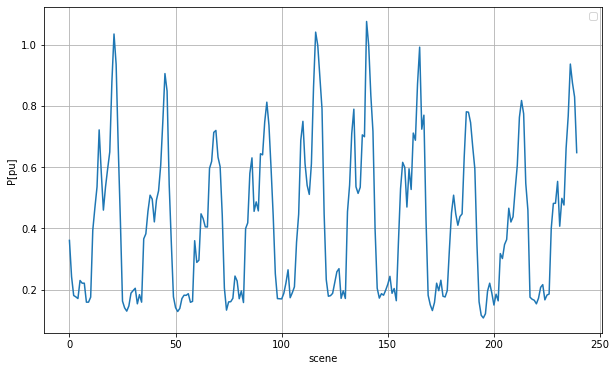

In [108]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
ax.plot(res[240:480])
    
ax.set_xlabel('scene')
ax.set_ylabel('P[pu]')

ax.legend()

ax.grid(True)


plt.show()

## Optimization models

In [208]:
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = 2.0)
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = None)
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_hours = 4000)
model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = None, overload_hours = None, max_i_pu = 1.2)

In [209]:
net.ext_grid['model'][0] = Resources.ExtGrid('SET', pr_mw = 10.0, peak_value=300, valley_value=150, rest_value=150)

In [210]:
net.load['model'][0] = Resources.Load('645', pr_mw = 1.20, pa_pu = Industrial_Synth)
net.load['model'][1] = Resources.Load('646', pr_mw = 1.50, pa_pu = Industrial_Synth)
net.load['model'][2] = Resources.Load('633', pr_mw = 0.80, pa_pu = Commercial_Synth)
net.load['model'][3] = Resources.Load('675', pr_mw = 0.90, pa_pu = Commercial_Synth)
net.load['model'][4] = Resources.Load('611', pr_mw = 0.50, pa_pu = Residential_Synth)
net.load['model'][5] = Resources.Load('652', pr_mw = 0.60, pa_pu = Residential_Synth)

In [211]:
net.sgen['model'][0] = Resources.PVGenerator('PV 684', ic_0_mu = 0.0, ic_1_mu = 1.35e6, oc_0_mu = 15.0e3/8760, oc_1_mu = 0.0)
net.sgen['model'][1] = Resources.PVGenerator('PV 633', ic_0_mu = 0.0, ic_1_mu = 1.35e6, oc_0_mu = 15.0e3/8760, oc_1_mu = 0.0)
net.sgen['model'][2] = Resources.PVGenerator('PV 646', ic_0_mu = 0.0, ic_1_mu = 1.35e6, oc_0_mu = 15.0e3/8760, oc_1_mu = 0.0)

#net.sgen['model'][1] = Resources.WTGeneratorDiscrete('WT1', unit_size_mw = 0.19, unit_cost_mu = 541e3, oc_0_mu = 0.00, oc_1_mu = 1.70)
#net.sgen['model'][2] = Resources.PVGeneratorDiscrete('PV2', unit_size_mw = 0.05, unit_cost_mu = 51e3, oc_0_mu = 0.03, oc_1_mu = 0.0)

In [212]:
#net.storage['model'][0] = Resources.Storage('ST1', ic_1_mu = 554e3, ic_1_mu_cap = 330e3, oc_1_mu = 2.28*4, eta_bb = 0.8, sigma = 2.1e-3)

In [213]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV 684,8,0.0,0.0,NaN,1.0,True,wye,True,7.870999,3.935499,Resource: PV 684
1,PV 633,2,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: PV 633
2,PV 646,4,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: PV 646
3,ST 684,8,0.0,0.0,NaN,1.0,True,wye,True,0.000000,0.000000,None
4,ST 632,1,0.0,0.0,NaN,1.0,True,wye,True,0.000000,0.000000,None


## Model Creation

In [214]:
model = model_writer.create_model()

In [215]:
if len(scenes) < 40:
    model.pprint()

### Additional Constraints

1) Only one PV plant
2) Only one Storage

In [216]:
#model_writer.additional_constraint("One PV", net.sgen['model'][0].create + net.sgen['model'][1].create + net.sgen['model'][2].create <= 1)

## Resolution

In [217]:
opt = pe.SolverFactory('cplex')
result_obj= opt.solve(model, tee=True)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 20.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2020.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jmsar\AppData\Local\Temp\tmplu821sxw.cplex.log' open.
CPLEX> Problem 'C:\Users\jmsar\AppData\Local\Temp\tmpypdlwh2s.pyomo.lp' read.
Read time = 0.64 sec. (26.05 ticks)
CPLEX> Problem name         : C:\Users\jmsar\AppData\Local\Temp\tmpypdlwh2s.pyomo.lp
Objective sense      : Minimize
Variables            :  262087  [Nneg: 60484,  Box: 201600,  Binary: 3]
Objective nonzeros   :   20163
Linear constraints   :  262084  [Less: 60483,  Equal: 201601]
  Nonzeros           :  534247
  RHS nonzeros       :  120961

Variables            : Min LB: -8.230705        Max UB: 10.00000       
Object

In [218]:
model_writer.backconfigure_network()

In [219]:
model_writer.net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV 684,8,0.0,0.0,NaN,1.0,True,wye,True,3.753564,1.876782,Resource: PV 684
1,PV 633,2,0.0,0.0,NaN,1.0,True,wye,True,1.494866,0.747433,Resource: PV 633
2,PV 646,4,0.0,0.0,NaN,1.0,True,wye,True,2.620030,1.310015,Resource: PV 646
3,ST 684,8,0.0,0.0,NaN,1.0,True,wye,True,0.000000,0.000000,None
4,ST 632,1,0.0,0.0,NaN,1.0,True,wye,True,0.000000,0.000000,None


In [221]:
net.sgen.max_p_mw[0] + net.sgen.max_p_mw[1] + net.sgen.max_p_mw[2] 

7.868460149320587

In [192]:
model_writer.net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,model


In [193]:
Resultados = model_writer.get_scenes_results()

In [194]:
Resultados

,SET_p_mw,645_p_mw,646_p_mw,633_p_mw,675_p_mw,611_p_mw,652_p_mw,PV 684_p_mw,L 650_632_pf_mw,L 632_671_pf_mw,L 671_684_pf_mw,L 632_645_pf_mw,L 645_646_pf_mw,L 632_633_pf_mw,L 671_675_pf_mw,L 684_611_pf_mw,L 684_652_pf_mw
0,2.336064,-0.669424,-0.832644,-0.174123,-0.205250,-0.218194,-0.236429,0.0,-2.336064,-0.659873,-0.454623,-1.502069,-0.832644,-0.174123,-0.205250,-0.218194,-0.236429
1,1.969899,-0.660324,-0.830368,-0.143900,-0.147216,-0.091194,-0.096898,0.0,-1.969899,-0.335308,-0.188092,-1.490692,-0.830368,-0.143900,-0.147216,-0.091194,-0.096898
2,1.858336,-0.647619,-0.775725,-0.121400,-0.171351,-0.060287,-0.081954,0.0,-1.858336,-0.313592,-0.142241,-1.423344,-0.775725,-0.121400,-0.171351,-0.060287,-0.081954
3,1.886345,-0.668468,-0.795401,-0.122052,-0.151307,-0.069736,-0.079381,0.0,-1.886345,-0.300423,-0.149116,-1.463870,-0.795401,-0.122052,-0.151307,-0.069736,-0.079381
4,1.878974,-0.646305,-0.807052,-0.153209,-0.135213,-0.064954,-0.072241,0.0,-1.878974,-0.272408,-0.137195,-1.453357,-0.807052,-0.153209,-0.135213,-0.064954,-0.072241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,4.208057,-0.942687,-1.159250,-0.599884,-0.743094,-0.337016,-0.426126,0.0,-4.208057,-1.506235,-0.763141,-2.101937,-1.159250,-0.599884,-0.743094,-0.337016,-0.426126
20156,4.341969,-0.980645,-1.196684,-0.584525,-0.696189,-0.421582,-0.462344,0.0,-4.341969,-1.580115,-0.883926,-2.177329,-1.196684,-0.584525,-0.696189,-0.421582,-0.462344
20157,4.145658,-0.922293,-1.113158,-0.520109,-0.638720,-0.402609,-0.548770,0.0,-4.145658,-1.590098,-0.951379,-2.035450,-1.113158,-0.520109,-0.638720,-0.402609,-0.548770
20158,3.475080,-0.816948,-0.980338,-0.411908,-0.482009,-0.349511,-0.434365,0.0,-3.475080,-1.265885,-0.783876,-1.797286,-0.980338,-0.411908,-0.482009,-0.349511,-0.434365


In [147]:
def plot_results(results, a = 0, b = 240, items = None, elements = False, lines = False, l_ep = False):
    # Set the plot curve with markers and a title
    if not (elements or lines or l_ep or items):
        raise Exception("Nothing to plot")
    
    fig, ax = plt.subplots(1, 1)

    fig.set_size_inches(10,6)
    
    for col in results:
        p = False
        if items and col in items:
            p = True
        elif col[0:2] == 'L ':
            if col[-4:] == 'ep_h':
                if l_ep:
                    p = True
            elif lines:
                p = True
        elif elements:
            p = True

        if p:
            ax.plot(results[col][a:b], label = col)
    
    ax.set_xlabel('time')
    ax.set_ylabel('P[mw]')

    ax.legend()

    ax.grid(True)


    plt.show()
    

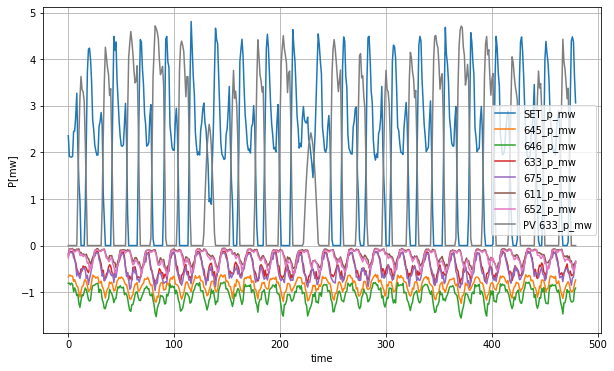

In [178]:
plot_results(Resultados, a = 0, b = 480, elements = True, lines = False, l_ep = False)

In [ ]:
plot_results(Resultados, a = 0, b = 240, lines = True)

In [ ]:
plot_results(Resultados, a = 0, b = 240, l_ep = True)

In [ ]:
plot_results(Resultados, a = 0, b = 240, items = ['PV1_p_mw', 'L 1_3_pf_mw'])

In [ ]:
for l in range(len(net.line)):
    print("Line: {0} - TEPH: {1}".format(net.line.model[l].name, net.line.model[l].get_tep_h()))

In [ ]:
net.line['model'][0].get_tep_h()

In [ ]:
net.line['model'][2].name

In [ ]:
net.line['model'][2].pr_mw

In [ ]:
net.line['model'][4].name

In [ ]:
net.line['model'][4].pr_mw

In [154]:
net.sgen.model[0].create.value+net.sgen.model[1].create.value+net.sgen.model[2].create.value

2.0